**Практика**

In [1]:
library(ISLR)
library(yardstick)
library(pROC)
library(boot)

Default$default = as.integer(Default$default == "Yes")
head(Default)

For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.

Type 'citation("pROC")' for a citation.


Присоединяю пакет: ‘pROC’


Следующие объекты скрыты от ‘package:stats’:

    cov, smooth, var




,default,student,balance,income
,<int>,<fct>,<dbl>,<dbl>
1,0,No,729.5265,44361.625
2,0,Yes,817.1804,12106.135
3,0,No,1073.5492,31767.139
4,0,No,529.2506,35704.494
5,0,No,785.6559,38463.496
6,0,Yes,919.5885,7491.559


# 5

a)

In [2]:
glm(default ~ income + balance, data = Default, family = 'binomial')


Call:  glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Coefficients:
(Intercept)       income      balance  
 -1.154e+01    2.081e-05    5.647e-03  

Degrees of Freedom: 9999 Total (i.e. Null);  9997 Residual
Null Deviance:	    2921 
Residual Deviance: 1579 	AIC: 1585

b) Вместо accuracy я буду использовать AUC - в отношении кроссвалидации разницы мало

In [3]:
set.seed(10)
train = sample(nrow(Default), nrow(Default)/2)

In [4]:
inc_bal_model = glm(
    default ~ income + balance, 
    data = Default, 
    family = 'binomial',
    subset = train
)

p_hat = predict(
    inc_bal_model,
    Default[-train,],
    type = "response"
)

auc(
    Default[-train,"default"], p_hat,
    quiet = TRUE
)

Area under the curve: 0.9527

c)

In [5]:
for (seed in 11:20){
    set.seed(seed)
    train = sample(nrow(Default), nrow(Default)/2)
    model = glm(
        default ~ income + balance, 
        data = Default,
        family = 'binomial',
        subset = train
    )
    
    print(paste('=====seed =', as.character(seed)))
    print(auc(
        Default$default[-train],
        predict(
            model,
            Default[-train,],
            type = "response"
        ),
        quiet = TRUE
    ))
}

[1] "=====seed = 11"
Area under the curve: 0.9456
[1] "=====seed = 12"
Area under the curve: 0.9381
[1] "=====seed = 13"
Area under the curve: 0.9399
[1] "=====seed = 14"
Area under the curve: 0.9475
[1] "=====seed = 15"
Area under the curve: 0.9523
[1] "=====seed = 16"
Area under the curve: 0.9536
[1] "=====seed = 17"
Area under the curve: 0.946
[1] "=====seed = 18"
Area under the curve: 0.9458
[1] "=====seed = 19"
Area under the curve: 0.9557
[1] "=====seed = 20"
Area under the curve: 0.9432


Каждый раз получается новый результат

d)

In [6]:
train = sample(nrow(Default), nrow(Default)/2)
Default[-train,"default"]

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [112] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [926] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[1000] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1148] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
[1370] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1407] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1555] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1592] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
[1666] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1703] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[1777] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 1 0

In [7]:
for (seed in 11:20){
    set.seed(seed)
    train = sample(nrow(Default), nrow(Default)/2)
    model = glm(
        default ~ income + student, 
        data = Default,
        family = 'binomial',
        subset = train
    )
    
    print(paste('=====seed =', as.character(seed)))
    print(auc(
        Default$default[-train],
        predict(
            model,
            Default[-train,],
            type = "response"
        ),
        quiet = TRUE
    ))
}

[1] "=====seed = 11"
Area under the curve: 0.5635
[1] "=====seed = 12"
Area under the curve: 0.5258
[1] "=====seed = 13"
Area under the curve: 0.5788
[1] "=====seed = 14"
Area under the curve: 0.5539
[1] "=====seed = 15"
Area under the curve: 0.5488
[1] "=====seed = 16"
Area under the curve: 0.5274
[1] "=====seed = 17"
Area under the curve: 0.5279
[1] "=====seed = 18"
Area under the curve: 0.562
[1] "=====seed = 19"
Area under the curve: 0.5508
[1] "=====seed = 20"
Area under the curve: 0.555


Модель с использованием переменной `student` значительно хуже модели, использующей вместо нее переменную `balance`

In [8]:
for (seed in 11:20){
    set.seed(seed)
    train = sample(nrow(Default), nrow(Default)/2)
    model = glm(
        default ~ income + balance, 
        data = Default,
        family = 'binomial',
        subset = train
    )
    
    print(paste('=====seed =', as.character(seed)))
    print(auc(
        Default$default[-train],
        predict(
            model,
            Default[-train,],
            type = "response"
        ),
        quiet = TRUE
    ))
}

[1] "=====seed = 11"
Area under the curve: 0.9456
[1] "=====seed = 12"
Area under the curve: 0.9381
[1] "=====seed = 13"
Area under the curve: 0.9399
[1] "=====seed = 14"
Area under the curve: 0.9475
[1] "=====seed = 15"
Area under the curve: 0.9523
[1] "=====seed = 16"
Area under the curve: 0.9536
[1] "=====seed = 17"
Area under the curve: 0.946
[1] "=====seed = 18"
Area under the curve: 0.9458
[1] "=====seed = 19"
Area under the curve: 0.9557
[1] "=====seed = 20"
Area under the curve: 0.9432


Получается `balance` и сам по себе отлично справляется!

# 6 Вычисление стандартных ошибок методом bootstrap

a) Получим стандартные ошибки коэффициентов, через привычную формулу

In [9]:
model = glm(default ~ income + balance, data = Default, family = 'binomial')
summary(model)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


b) Функция что принимает индексы обучающей выбоки и возвращаяет соответсвующие оценки коэффициентов

In [10]:
boot.fn = function(data, train){
    model = glm(
        default ~ income + balance,
        data[train,],
        family = "binomial"
    )
    return(summary(model)$coefficients[,1])
}

boot.fn(Default,c(2,3,4,5))

(Intercept)        income       balance 
-2.356607e+01 -7.751413e-19 -5.792746e-18

c) Примняем bootstrap

Процедура оказалась достаточно долгая потому результат сохраняем в файл а потом достаем обратно, чтобы каждый запуск не ждать

Результаты bootstrap

In [11]:
boot_sd = scan("6boot_res.txt")

d) Сравнить вычисления по формуле и bootstrap

In [12]:
boot_sd
unname(summary(model)$coefficients[,2])

[1] 4.398901e-01 4.724240e-06 2.314398e-04

[1] 4.347564e-01 4.985167e-06 2.273731e-04

Результаты сопоставимы

# 7

Реализация алгоритма LOOCV

## (a) Постоить логистическую регрессию 
Требуется предсказывать `Direction` через `Lag1` и `Lag2` 

In [13]:
lag1_lag2 = glm(Direction ~ Lag1 + Lag2, data = Weekly, family = "binomial")
summary(lag1_lag2)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = "binomial", data = Weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.623  -1.261   1.001   1.083   1.506  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22122    0.06147   3.599 0.000319 ***
Lag1        -0.03872    0.02622  -1.477 0.139672    
Lag2         0.06025    0.02655   2.270 0.023232 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1488.2  on 1086  degrees of freedom
AIC: 1494.2

Number of Fisher Scoring iterations: 4


## (b) Выкидываем первое наблюдение

Сторим туже модель, но без использования перового наблюдения

In [14]:
lag1_lag2_1 = glm(Direction ~ Lag1 + Lag2, data = Weekly[2:nrow(Weekly),], family = "binomial")
summary(lag1_lag2_1)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = "binomial", data = Weekly[2:nrow(Weekly), 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6258  -1.2617   0.9999   1.0819   1.5071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22324    0.06150   3.630 0.000283 ***
Lag1        -0.03843    0.02622  -1.466 0.142683    
Lag2         0.06085    0.02656   2.291 0.021971 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Number of Fisher Scoring iterations: 4


## (c) Предсказываем полученной моделью для перовго наблюдения

In [15]:
predict(lag1_lag2_1, Weekly[1,], type = "response")

1 
0.5713923

Получается что предсказанное `Direction` для первого наблюдения `Up`.

In [16]:
Weekly[1,]

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.27,Down


Хотя в дейсвительности `Down`

## (d) LOOCV руками 

Требуется написать цикл в котором будут перебираться все наблюдения. Модель будет обучаться на всех кроме того для которого текущая итерация, и пытаться предсказать текущее. Мы будем собирать результаты каждой итерации как 0 в случае неудачи и 1 в случае успеха.

In [17]:
result = c()

for(i in 1:nrow(Weekly)){
    curr_fit = glm(
        Direction ~ Lag1 + Lag2, 
        data = Weekly[-i,], 
        family = "binomial"
    )
    result = c(
        result, predict(curr_fit, Weekly[i,], type = "response") > 0.5
    )
}

In [18]:
mean(result == (Weekly$Direction == "Up"))

[1] 0.5500459

У нас с такой моделью получается правильно предсказывать в 55% случаев! Что в целом не плохо для такой то задачи.

# 8 Прекрестная проверка на имитированном наборе данных

## (a) Создание набора данных

In [19]:
set.seed(1)
x = rnorm(100)
y = x - 2*x^2 + rnorm(100)

Предполанаю, что:
- $n$ - число наблюдений $\Rightarrow n = 100$;
- $p$ - число экзогенных переменных $\Rightarrow p = 1$.

В виде уравнения:

$$y = x - 2x^2 + \varepsilon$$

## (b) Построить график зависимости $y$ от $x$

Я так понимаю речь идет о диаграмме рассеяния

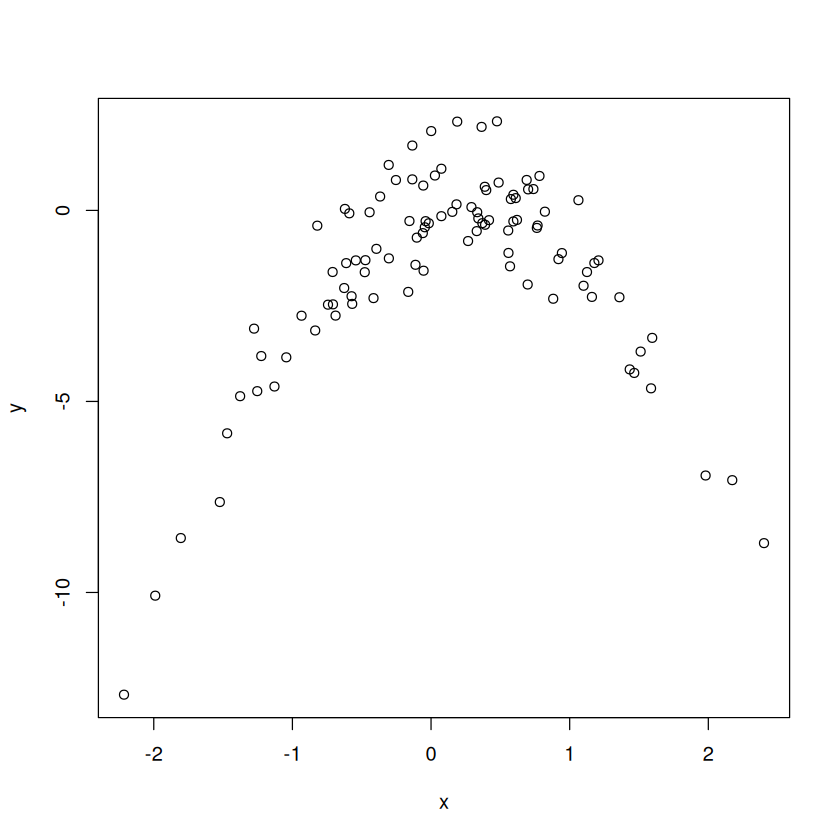

In [20]:
plot(x,y)

Заложили параболу - получили параболу.

## (c) Провести LOOCV

Для полиномиальных моделей вплоть до 4-ой степени.

In [21]:
set.seed(1)
x = rnorm(100)
y = x - 2*x^2 + rnorm(100)
df = data.frame(x = x, y = y)

for (i in 1:4){
    model = glm(y ~ poly(x,i), data = df)
    print(cv.glm(df, model)$delta[1])
}

[1] 7.288162
[1] 0.9374236
[1] 0.9566218
[1] 0.9539049


## (d) Провести LOOCV с новым `seed`

Используя теже идентификационные формы, что и раньше.

In [22]:
set.seed(5)
x = rnorm(100)
y = x - 2*x^2 + rnorm(100)
df = data.frame(x = x, y = y)


for (i in 1:4){
    model = glm(y ~ poly(x,i), data = df)
    print(cv.glm(df, model)$delta[1])
}

[1] 7.642912
[1] 1.12506
[1] 1.109894
[1] 1.133182


**Похожи ли эти результаты на то, что вы получали в (с)?**<br>
Да, похожи.<br>
**Почему?**<br>
Потому как в обоих случаях модель идентификационной формы совпадающей с теоритической получает наименьшую ошибку.

## (e) 

**Какая из четырех моделей обладала наименьшей ошибкой?**<br>
Модель, чья идентификационная форма полином второй степени.<br>
**Ожидали ли вы такой результат?**<br>
Да.<br>
**Объясните свой ответ.**<br>
Эта идентификационная форма наиболее приближена к дейсвительной, потому я ожидал, что соответвующие модели будут выдвать наибольшую производительность.

## (f) Значимость коэффициентов в моделях полученных в (с)

In [23]:
set.seed(1)
x = rnorm(100)
y = x - 2*x^2 + rnorm(100)
df = data.frame(x = x, y = y)

In [24]:
summary(glm(y~x, data = df))


Call:
glm(formula = y ~ x, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.5161  -0.6800   0.6812   1.5491   3.8183  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.6254     0.2619  -6.205 1.31e-08 ***
x             0.6925     0.2909   2.380   0.0192 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 6.760719)

    Null deviance: 700.85  on 99  degrees of freedom
Residual deviance: 662.55  on 98  degrees of freedom
AIC: 478.88

Number of Fisher Scoring iterations: 2


In [25]:
summary(glm(y~poly(x,2), data = df))


Call:
glm(formula = y ~ poly(x, 2), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9650  -0.6254  -0.1288   0.5803   2.2700  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5500     0.0958  -16.18  < 2e-16 ***
poly(x, 2)1   6.1888     0.9580    6.46 4.18e-09 ***
poly(x, 2)2 -23.9483     0.9580  -25.00  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9178258)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  89.029  on 97  degrees of freedom
AIC: 280.17

Number of Fisher Scoring iterations: 2


In [26]:
summary(glm(y~poly(x,3), data = df))


Call:
glm(formula = y ~ poly(x, 3), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9765  -0.6302  -0.1227   0.5545   2.2843  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09626 -16.102  < 2e-16 ***
poly(x, 3)1   6.18883    0.96263   6.429 4.97e-09 ***
poly(x, 3)2 -23.94830    0.96263 -24.878  < 2e-16 ***
poly(x, 3)3   0.26411    0.96263   0.274    0.784    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9266599)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  88.959  on 96  degrees of freedom
AIC: 282.09

Number of Fisher Scoring iterations: 2


In [27]:
summary(glm(y~poly(x,4), data = df))


Call:
glm(formula = y ~ poly(x, 4), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


**Согласуются ли эти результаты, с выводами сделанными на основе перекрестной проверки?**
Да согласуются:
- В случае недостаточно гибкой модели получается, что коэффициент не значимый;
- В случае квадратичной модели, значимость идеальная;
- В случае излишне гибких моделей, лишние коэффициенты совершенно не значимы.

# 9

Используется набор данных `boston` из библиотеки `MASS`.

In [28]:
library(MASS)

## (a) Вычислить среднее `medv`

Далее получаенная величина будет обозначаться как $\hat{\mu}$

In [29]:
mu = mean(Boston$medv)
mu

[1] 22.53281

## (b) Вычислить стандартную ошибку $\hat{\mu}$

Стандартная ошибка выборочной средней может быть вычислена так:

$$\delta_{\hat{\mu}} = \frac{\hat{\sigma}}{\sqrt{n}}$$

Где:
- $\hat{\sigma}$ - выборочное стандартное отклонение;
- $n$ - объем выборки.

In [30]:
sd(Boston$medv)/sqrt(nrow(Boston))

[1] 0.4088611

## (c) Вычисление $\delta_{\hat{\mu}}$ с использование bootstrap

In [31]:
library(boot)
boot(
    function(data, index) mean(data[index,]$medv), 
    data = Boston, R = 1000
)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = function(data, index) mean(data[index, 
    ]$medv), R = 1000)


Bootstrap Statistics :
    original      bias    std. error
t1* 22.53281 0.008186957   0.4100113

В данном случае стандартная ошибка записана под полем `std.error` и составляет $\approx 0.41$

**Насколько она отличается от величины, полученной в (b)?**

In [32]:
0.408861147497535 - 0.4084658

[1] 0.0003953475

## (d) Вычисление доверительного интервала

Используя `bootstrap` оценку.<br>
Для того используется формула:<br>
$$[\hat{\mu}-2\delta_{\hat{\mu}}; \hat{\mu}+2\delta_{\hat{\mu}}]$$

In [36]:
c(mean(Boston$medv) - 2*0.4100113, mean(Boston$medv) + 2*0.4100113)

[1] 21.71278 23.35283

## (e) Произвести оценку медианы $\hat{\mu}_{med}$

In [ ]:
median(Boston$medv)

[1] 21.2

## (f) Оцентка станднарной ошибки $\hat{\mu}_{med}$

С использованием метода `bootstrap`

In [ ]:
boot(
    function(data, index) median(data[index,]$medv), 
    data = Boston, R = 1000
)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = function(data, index) median(data[index, 
    ]$medv), R = 1000)


Bootstrap Statistics :
    original   bias    std. error
t1*     21.2 -0.03975   0.3768813

$\delta_{\hat{\mu}_{med}} = 0.37688$

## (g) Вычисление 10-го персентиля стоимости домов в Бостоне𝛿𝜇̂ 𝑚𝑒𝑑=0.37688



In [43]:
quantile(Boston$medv, c(0.1))

10% 
12.75

## (h) Оценка стандартной ошибки

In [96]:
boot_result = boot(
    function(data, index) quantile(data[index,]$medv, c(0.1)), 
    data = Boston, R = 1000
)


boot_result


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = function(data, index) quantile(data[index, 
    ]$medv, c(0.1)), R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    12.75  0.0017   0.5127622

Для того, чтобы сделать вывод проведем вычисление доверительного интервала.

In [100]:
pers_10 =  as.numeric(c(quantile(Boston$medv, c(0.1))))

c(pers_10 - 2*sd(boot_result$t), pers_10 + 2*sd(boot_result$t))

[1] 11.72448 13.77552

С вероятностью 95%, 10% самых дешевых домов в Бостоне не стоят не дороже 13.7 тыс.долл.